In [3]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 9.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 424 kB 8.6 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 701 kB 42.9 MB/s 
     |████████████████████████████████| 44 kB 2.9 MB/s 
     |████████████████████████████████| 11.2 MB 44.9 MB/s 
     |████████████████████████████████| 9.8 MB 47.0 MB/s 
     |████████████████████████████████| 1.4 MB 48.9 MB/s 
     |████████████████████████████████| 76.6 MB 72 kB/s 
     |████████████████████████████████| 944 kB 50.1 MB/s 
     |████████████████████████████████| 419 kB 60.3 MB/s 
     |████████████████████████████████| 5.9 MB 44.4 MB/s 
     |████████████████████████████████| 141 kB 33.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: tensorboard

In [5]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 6.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [6]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 3.1 MB/s 


In [7]:
EPOCHS = 500
INLEN = 32
HIDDEN = 64
LSTMLAYERS =10
ATTHEADS = 4
DROPOUT = 0.1
BATCH = 32

N_FC = 36           # default forecast horizon
RAND = 42           # set random state
N_SAMPLES = 100     # number of times a prediction is sampled from a probabilistic model
N_JOBS = 3          # parallel processors to use;  -1 = all processors

# default quantiles for QuantileRegression
QUANTILES = [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]

TRAIN = "19571201"  # train/test split
MSEAS = 60          # max seasonality to check: months
ALPHA = 0.05        # significance level for seasonality test
FIGSIZE = (9, 6)

qL1, qL2, qL3 = 0.01, 0.05, 0.10        # percentiles of predictions: lower bounds
qU1, qU2, qU3 = 1-qL1, 1-qL2, 1-qL3     # upper bounds derived from lower bounds
label_q1 = f'{int(qU1 * 100)} / {int(qL1 * 100)} percentile band'
label_q2 = f'{int(qU2 * 100)} / {int(qL2 * 100)} percentile band'
label_q3 = f'{int(qU3 * 100)} / {int(qL3 * 100)} percentile band'

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel,TCNModel, TransformerModel, NaiveSeasonal, NaiveDrift, ExponentialSmoothing,Prophet
from darts.utils.statistics import check_seasonality, extract_trend_and_seasonality
from darts.metrics import mape
from darts.datasets import AirPassengersDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression
from darts.utils.utils import ModelMode, SeasonalityMode, TrendMode


pd.set_option("display.precision",2)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:,.2f}'.format

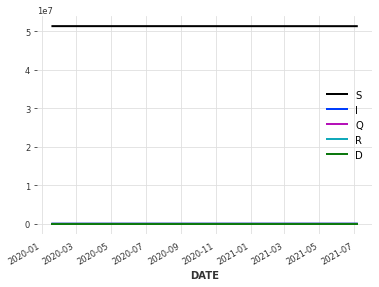

In [78]:

from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller
import numpy as np
import pandas as pd
import time
from darts.metrics.metrics import mae



df = pd.read_excel('covid_534days_Korea.xlsx')
df.set_index('DATE')
df=df.sort_values(by=['DATE'], ascending=True)
df3=df.sort_values(by=['DATE'], ascending=True)

# df.drop(df.tail(47).index,inplace=True) # drop last n rows
# df3.drop(df.tail(47).index,inplace=True) # drop last n rows

#Daily numbers
susceptible=df[['S']].to_numpy()
infected=df[['I']].to_numpy()
quarantined=df[['Q']].to_numpy()
deceased=df[['D']].to_numpy()
recovered=df[['R']].to_numpy()


I=list(infected[:,0])
Q=list(quarantined[:,0])
D=list(deceased[:,0])
R=list(recovered[:,0])
S=list(susceptible[:,0])


df_s=pd.DataFrame({'y': S})
df_s['ds'] = df[['DATE']]
df_s.set_index('ds')
df_s=df_s.sort_values(by=['ds'], ascending=False)

df_i=pd.DataFrame({'y': I})
df_i['ds'] = df[['DATE']]
df_i.set_index('ds')
df_i=df_i.sort_values(by=['ds'], ascending=False)

df_q=pd.DataFrame({'y': Q})
df_q['ds'] = df[['DATE']]
df_q.set_index('ds')
df_q=df_q.sort_values(by=['ds'], ascending=False)

df_r=pd.DataFrame({'y': R})
df_r['ds'] = df[['DATE']]
df_r.set_index('ds')
df_r=df_r.sort_values(by=['ds'], ascending=False)

df_d=pd.DataFrame({'y': D})
df_d['ds'] = df[['DATE']]
df_d.set_index('ds')
df_d=df_d.sort_values(by=['ds'], ascending=True)





# df.insert(2,'S',S,True)
# df.insert(2,'I',I,True)
# df.insert(2,'Q',Q,True)
# df.insert(2,'R',R,True)
# df.insert(2,'D',D,True)



# df = df.head(715)


# df1=df[["DATE","S","I","Q","D","R"]]

# df = df.set_index('DATE')


df_day_avg = df.groupby(df3["DATE"].astype(str).str.split(" ").str[0]).mean().reset_index()

value_filler = MissingValuesFiller()
series = TimeSeries.from_dataframe(df, "DATE", ["S","I","Q","R","D"])
uni_series_S = value_filler.transform(TimeSeries.from_dataframe(df, 'DATE', ["S"]))
uni_series_I = value_filler.transform(TimeSeries.from_dataframe(df, 'DATE', ["I"]))
uni_series_Q = value_filler.transform(TimeSeries.from_dataframe(df, 'DATE', ["Q"]))
uni_series_R = value_filler.transform(TimeSeries.from_dataframe(df, 'DATE', ["R"]))
uni_series_D = value_filler.transform(TimeSeries.from_dataframe(df, 'DATE', ["D"]))
series.plot()


ts=series

In [14]:
df["DATE"][len(df.index)-1]

Timestamp('2021-07-06 00:00:00')

In [11]:
len(df.index)

534

In [79]:
FC_N = 1             # forecast periods
FC_STRIDE = 1
FC_START = "20210621"   # period at which to split training and validation dataset
DROP = 0.1
LEARN = 0.001
EPOCH = 300 

In [80]:

# split training vs validation datasets
# train, val = ts.split_after(pd.Timestamp(FC_START))
train, val = ts[:-15], ts[-15:]
# normalize the time series
trf = Scaler()
train_trf = trf.fit_transform(train)
val_trf = trf.transform(val)
ts_trf = trf.transform(ts)

# derive the month from the date strings
month_series = datetime_attribute_timeseries(ts, attribute='month', one_hot=True)

scaler_month = Scaler()
covariates = scaler_month.fit_transform(month_series)


# split training vs validation datasets
train_trf, val_trf = ts_trf.split_after(pd.Timestamp(FC_START))
cov_train, cov_val = covariates.split_after(pd.Timestamp(FC_START))

Neural Prophet

In [17]:
from neuralprophet import NeuralProphet
import pandas as pd
from datetime import datetime

model = NeuralProphet()
df_train, df_test = model.split_df(df_s, valid_p=0.022)
metrics_train = model.fit(df=df_train, freq="D")
metrics_test = model.test(df=df_test)
metrics_test
m_s=metrics_test['MAE'][0]


  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

Epoch[242/242]: 100%|██████████| 242/242 [00:14<00:00, 16.67it/s, SmoothL1Loss=0.00165, MAE=874, RMSE=1.1e+3, RegLoss=0]


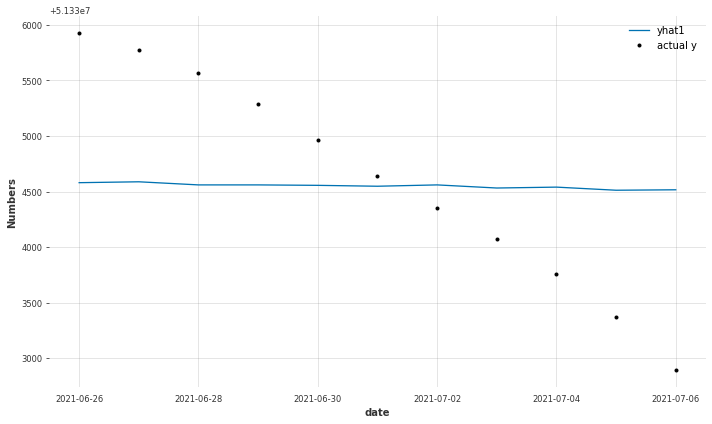

In [19]:
forecast = model.predict(df_test)
fig = model.plot(forecast,xlabel="date",
                     ylabel="Numbers")

In [20]:
forecast

,ds,y,yhat1,residual1,trend,season_weekly
0,2021-06-26,"51,335,925.41","51,334,580.00","-1,345.41","51,334,584.00",-5.81
1,2021-06-27,"51,335,777.48","51,334,588.00","-1,189.48","51,334,576.00",9.65
2,2021-06-28,"51,335,571.47","51,334,560.00","-1,011.47","51,334,572.00",-11.87
3,2021-06-29,"51,335,288.95","51,334,560.00",-728.95,"51,334,564.00",-2.79
4,2021-06-30,"51,334,963.65","51,334,556.00",-407.65,"51,334,560.00",-3.29
5,2021-07-01,"51,334,642.31","51,334,548.00",-94.31,"51,334,552.00",-2.25
6,2021-07-02,"51,334,356.52","51,334,560.00",203.48,"51,334,544.00",16.36
7,2021-07-03,"51,334,077.18","51,334,532.00",454.82,"51,334,540.00",-5.81
8,2021-07-04,"51,333,760.00","51,334,540.00",780.00,"51,334,532.00",9.65
9,2021-07-05,"51,333,368.08","51,334,512.00","1,143.92","51,334,524.00",-11.87


In [21]:
print("MAE (S): ",m_s)

MAE (S):  815.6363525390625


In [22]:
y_ref=forecast['y']
y_pred=forecast['yhat1']
y_ref.to_csv('s_ref_neural_prophet.csv')
y_pred.to_csv('s_pred_neural_prophet.csv')

In [23]:
model = NeuralProphet()
df_train, df_test = model.split_df(df_i, valid_p=0.022)
metrics_train = model.fit(df=df_train, freq="D")
metrics_test = model.test(df=df_test)
metrics_test
m_i=metrics_test['MAE'][0]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

Epoch[242/242]: 100%|██████████| 242/242 [00:14<00:00, 16.52it/s, SmoothL1Loss=0.00532, MAE=56.4, RMSE=78.8, RegLoss=0]


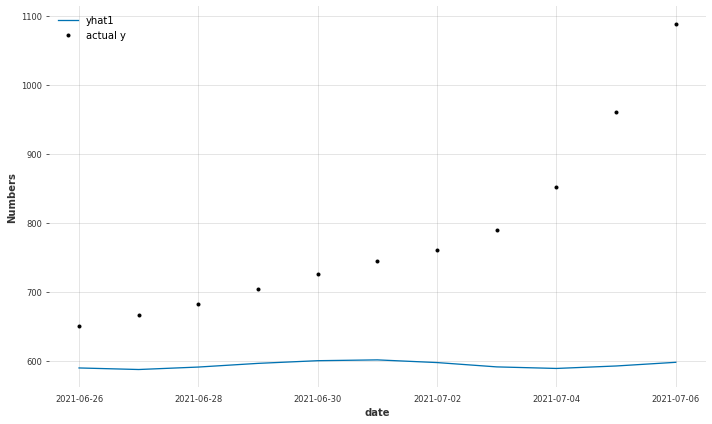

In [24]:
forecast = model.predict(df_test)
fig = model.plot(forecast,xlabel="date",
                     ylabel="Numbers")

In [25]:
forecast

,ds,y,yhat1,residual1,trend,season_weekly
0,2021-06-26,650.98,589.56,-61.42,594.01,-4.45
1,2021-06-27,665.87,587.31,-78.57,594.23,-6.92
2,2021-06-28,682.56,590.87,-91.69,594.45,-3.58
3,2021-06-29,703.36,596.21,-107.15,594.67,1.54
4,2021-06-30,725.34,600.09,-125.25,594.89,5.20
5,2021-07-01,744.30,601.27,-143.03,595.11,6.16
6,2021-07-02,760.16,597.38,-162.78,595.33,2.05
7,2021-07-03,789.41,591.10,-198.31,595.55,-4.45
8,2021-07-04,852.69,588.85,-263.84,595.77,-6.92
9,2021-07-05,961.25,592.41,-368.84,595.99,-3.58


In [26]:
print("MAE (I): ",m_i)

MAE (I):  190.181396484375


In [27]:
y_ref=forecast['y']
y_pred=forecast['yhat1']
y_ref.to_csv('i_ref_neural_prophet.csv')
y_pred.to_csv('i_pred_neural_prophet.csv')

In [28]:
model = NeuralProphet()
df_train, df_test = model.split_df(df_q,  valid_p=0.022)
metrics_train = model.fit(df=df_train, freq="D")
metrics_test = model.test(df=df_test)
metrics_test
m_q=metrics_test['MAE'][0]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

Epoch[242/242]: 100%|██████████| 242/242 [00:20<00:00, 11.78it/s, SmoothL1Loss=0.00309, MAE=805, RMSE=1.04e+3, RegLoss=0]


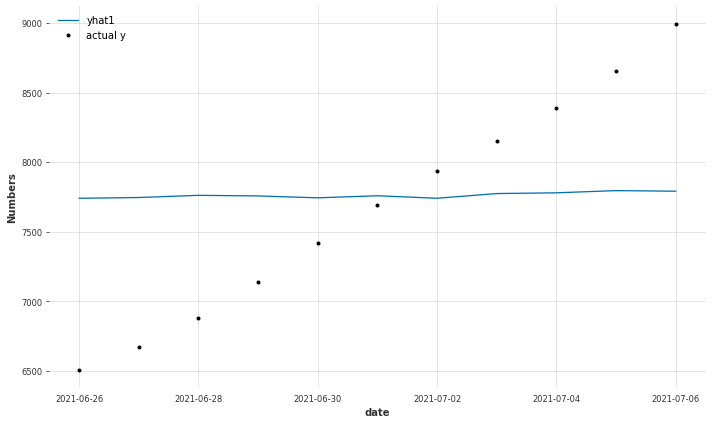

In [29]:
forecast = model.predict(df_test)
fig = model.plot(forecast,xlabel="date",
                     ylabel="Numbers")

In [30]:
print("MAE (Q): ",m_q)

MAE (Q):  676.408447265625


In [31]:
y_ref=forecast['y']
y_pred=forecast['yhat1']
y_ref.to_csv('q_ref_neural_prophet.csv')
y_pred.to_csv('q_pred_neural_prophet.csv')

In [32]:
model = NeuralProphet()
df_train, df_test = model.split_df(df_r, valid_p=0.022)
metrics_train = model.fit(df=df_train, freq="D")
metrics_test = model.test(df=df_test)
metrics_test
m_r=metrics_test['MAE'][0]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

Epoch[242/242]: 100%|██████████| 242/242 [00:14<00:00, 16.59it/s, SmoothL1Loss=0.00954, MAE=66.4, RMSE=92.5, RegLoss=0]


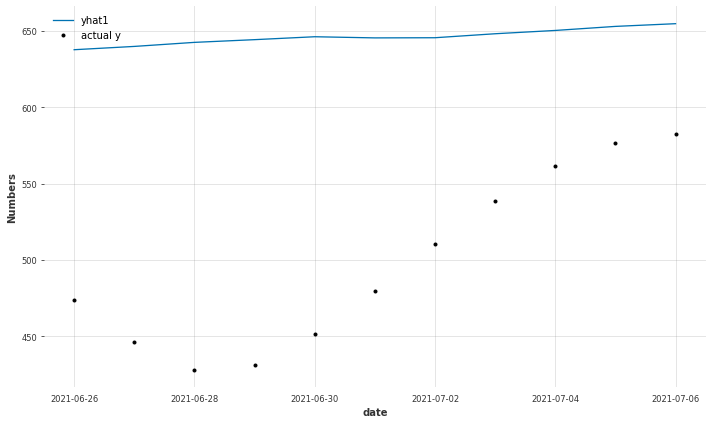

In [33]:
forecast = model.predict(df_test)
fig = model.plot(forecast,xlabel="date",
                     ylabel="Numbers")

In [34]:
print("MAE (R): ",m_r)

MAE (R):  147.89268493652344


In [35]:
y_ref=forecast['y']
y_pred=forecast['yhat1']
y_ref.to_csv('r_ref_neural_prophet.csv')
y_pred.to_csv('r_pred_neural_prophet.csv')

In [36]:
model = NeuralProphet()
df_train, df_test = model.split_df(df_d, valid_p=0.022)
metrics_train = model.fit(df=df_train, freq="D")
metrics_test = model.test(df=df_test)
metrics_test
m_d=metrics_test['MAE'][0]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

Epoch[242/242]: 100%|██████████| 242/242 [00:14<00:00, 16.71it/s, SmoothL1Loss=0.00439, MAE=1.1, RMSE=1.59, RegLoss=0]


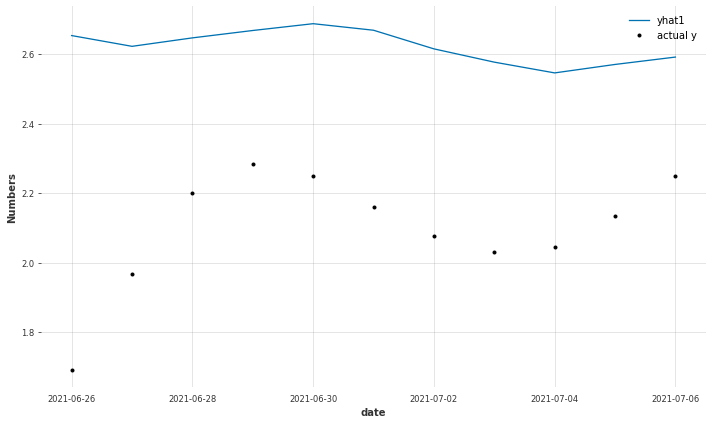

In [37]:
forecast = model.predict(df_test)
fig = model.plot(forecast,xlabel="date",
                     ylabel="Numbers")

In [38]:
print("MAE (D): ",m_d)

MAE (D):  0.5235077142715454


In [39]:
y_ref=forecast['y']
y_pred=forecast['yhat1']
y_ref.to_csv('d_ref_neural_prophet.csv')
y_pred.to_csv('d_pred_neural_prophet.csv')

In [40]:
print("MAE: ",sum([m_s,m_i,m_q,m_r,m_d])/5)

MAE:  366.1284777879715


Temporal Convolution Network

Training: 0it [00:00, ?it/s]

Predicting: 15it [00:00, ?it/s]

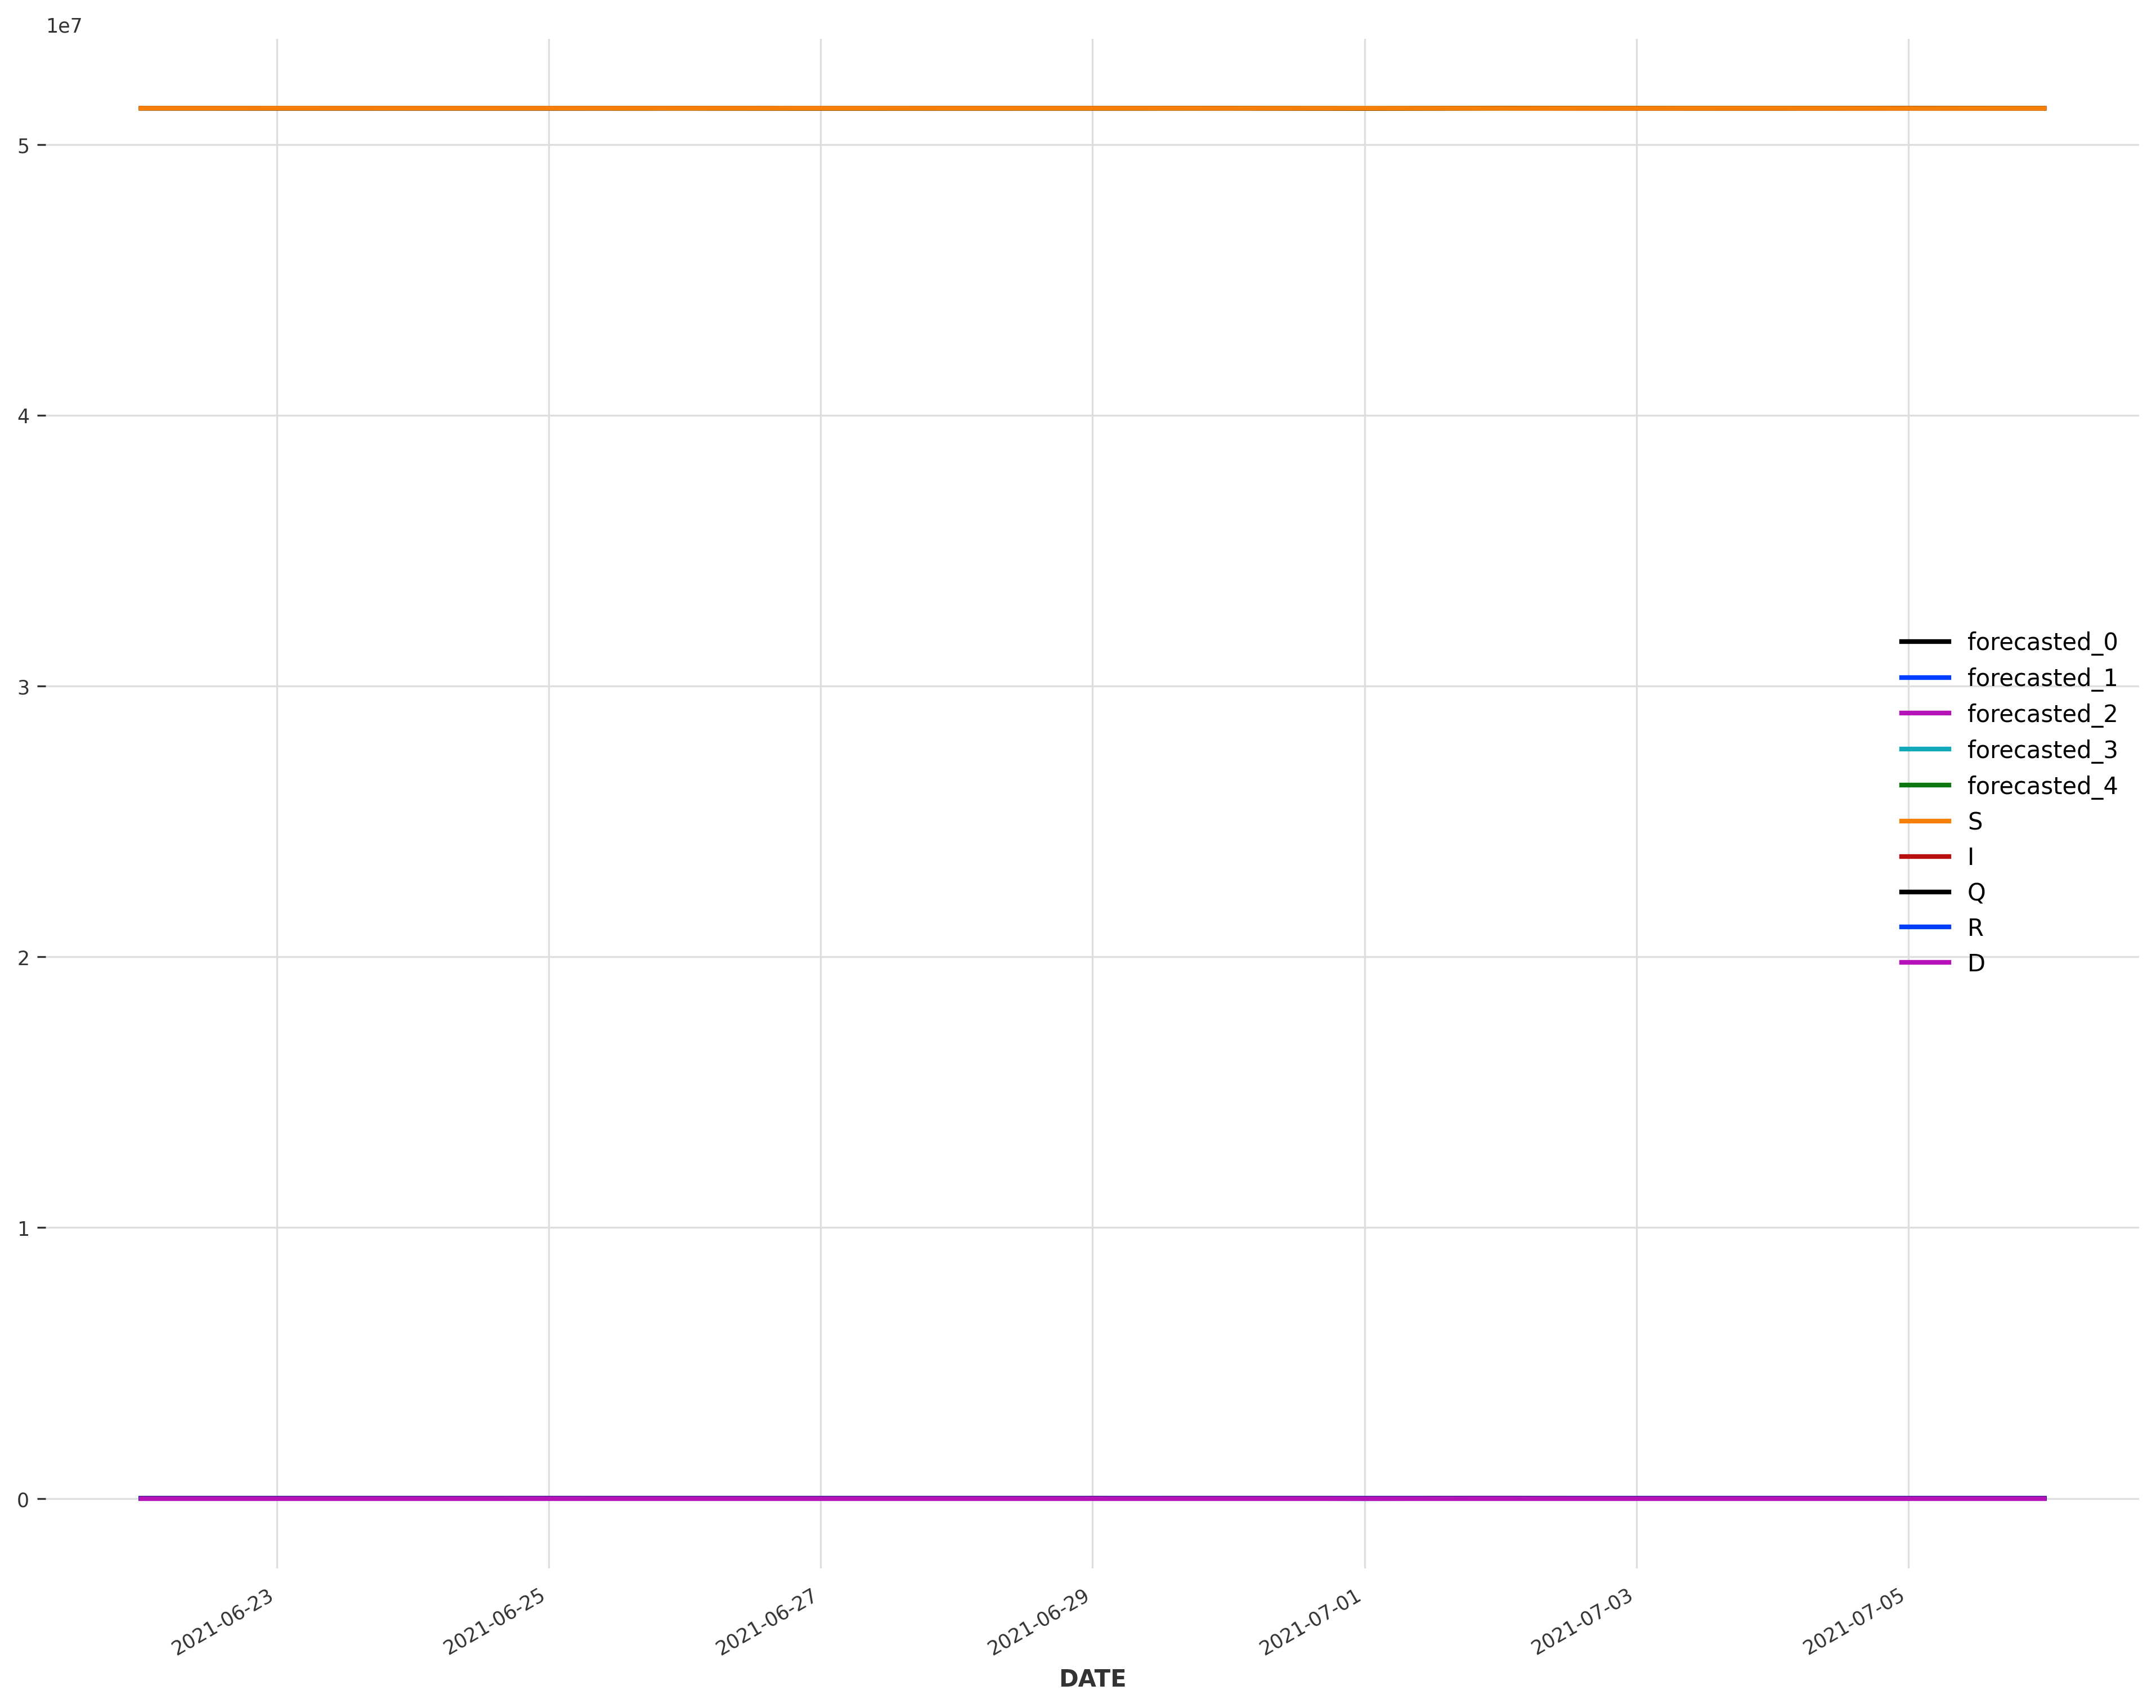

In [87]:
model_TCN = TCNModel(
    n_epochs=200, 
    input_chunk_length=30,
    output_chunk_length=15, 
    dropout=0.1, 
    dilation_base=1, 
    weight_norm=True,
    kernel_size=20,
    num_filters=20,
    random_state=0
)
# training
model_TCN.fit(
            series=train,
            # past_covariates=cov_train,
            # verbose=True
)

pred = model_TCN.predict(len(val),
            # past_covariates=cov_train
)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=300)
# train.plot()
pred.plot(label='forecasted')
val.plot()

plt.legend()


In [91]:
val.to_csv('tcn_validation_states.csv')

In [92]:
pred.to_csv('tcn_predicted_states.csv')

In [88]:
mae(val,pred) 

2468.3955826844945

Exponential Smoothing check

In [64]:
# # Read a pandas DataFrame

# dfp = pd.read_excel('covid.xlsx')



# df1=dfp[["DATE","CONFIRM","RELEASE"]]
# df = df1.set_index('DATE')


# df_day_avg = dfp.groupby(dfp['DATE'].astype(str).str.split(" ").str[0]).mean().reset_index()


# # Create a TimeSeries, specifying the time and value columns
# series = TimeSeries.from_dataframe(df_day_avg, 'DATE', 'CONFIRM')

# uni_series=series

# Set aside the last 36 months as a validation series

#S-------------------------------------------------------
train, val = uni_series_S[:-15], uni_series_S[-15:]

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

val.to_csv('ExponentialSmoothing_validation_S.csv')
prediction.to_csv('ExponentialSmoothing_prediction_S.csv')

mae1=mae(val,prediction) 

# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# figure(figsize=(16, 12), dpi=300)

# uni_series.plot()
# prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
# plt.legend()


#I-------------------------------------------------------
train, val = uni_series_I[:-15], uni_series_I[-15:]

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

val.to_csv('ExponentialSmoothing_validation_I.csv')
prediction.to_csv('ExponentialSmoothing_prediction_I.csv')

mae2=mae(val,prediction) 

# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# figure(figsize=(16, 12), dpi=300)

# uni_series.plot()
# prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
# plt.legend()


#Q-------------------------------------------------------
train, val = uni_series_Q[:-15], uni_series_Q[-15:]

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

val.to_csv('ExponentialSmoothing_validation_Q.csv')
prediction.to_csv('ExponentialSmoothing_prediction_Q.csv')

mae3=mae(val,prediction) 

# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# figure(figsize=(16, 12), dpi=300)

# uni_series.plot()
# prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
# plt.legend()


#R-------------------------------------------------------
train, val = uni_series_R[:-15], uni_series_R[-15:]

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

val.to_csv('ExponentialSmoothing_validation_R.csv')
prediction.to_csv('ExponentialSmoothing_prediction_R.csv')

mae4=mae(val,prediction) 

# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# figure(figsize=(16, 12), dpi=300)

# uni_series.plot()
# prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
# plt.legend()


#D-------------------------------------------------------
train, val = uni_series_D[:-15], uni_series_D[-15:]

from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

val.to_csv('ExponentialSmoothing_validation_D.csv')
prediction.to_csv('ExponentialSmoothing_prediction_D.csv')

mae5=mae(val,prediction) 

# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# figure(figsize=(16, 12), dpi=300)

# uni_series.plot()
# prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
# plt.legend()

print((mae1+mae2+mae3+mae4+mae5)/5)


651.0833076552808


Fusion Transformer

In [65]:
import torch
# split training vs validation datasets
# train, val = ts.split_after(pd.Timestamp(FC_START))
train, val = ts[:-15], ts[-15:]
# normalize the time series
trf = Scaler()
train_trf = trf.fit_transform(train)
val_trf = trf.transform(val)
ts_trf = trf.transform(ts)

# derive the month from the date strings
month_series = datetime_attribute_timeseries(ts, attribute='month', one_hot=True)

scaler_month = Scaler()
covariates = scaler_month.fit_transform(month_series)


# split training vs validation datasets
train_trf, val_trf = ts_trf.split_after(pd.Timestamp(FC_START))
cov_train, cov_val = covariates.split_after(pd.Timestamp(FC_START))


model = TFTModel(   input_chunk_length=40,
                    output_chunk_length=1,
                    hidden_size=10,
                    lstm_layers=3,
                    num_attention_heads=ATTHEADS,
                    dropout=DROPOUT,
                    n_epochs=100,
                    # likelihood=QuantileRegression(quantiles=QUANTILES), 
                    loss_fn=torch.nn.MSELoss(),
                    # random_state=RAND, 
                    # force_reset=True
                 )


# training
model.fit(
            series=train_trf,
            future_covariates=covariates,
            # verbose=True
)

pred = model.predict(len(val_trf),
            # past_covariates=cov_train
)



Training: 0it [00:00, ?it/s]

Predicting: 16it [00:00, ?it/s]

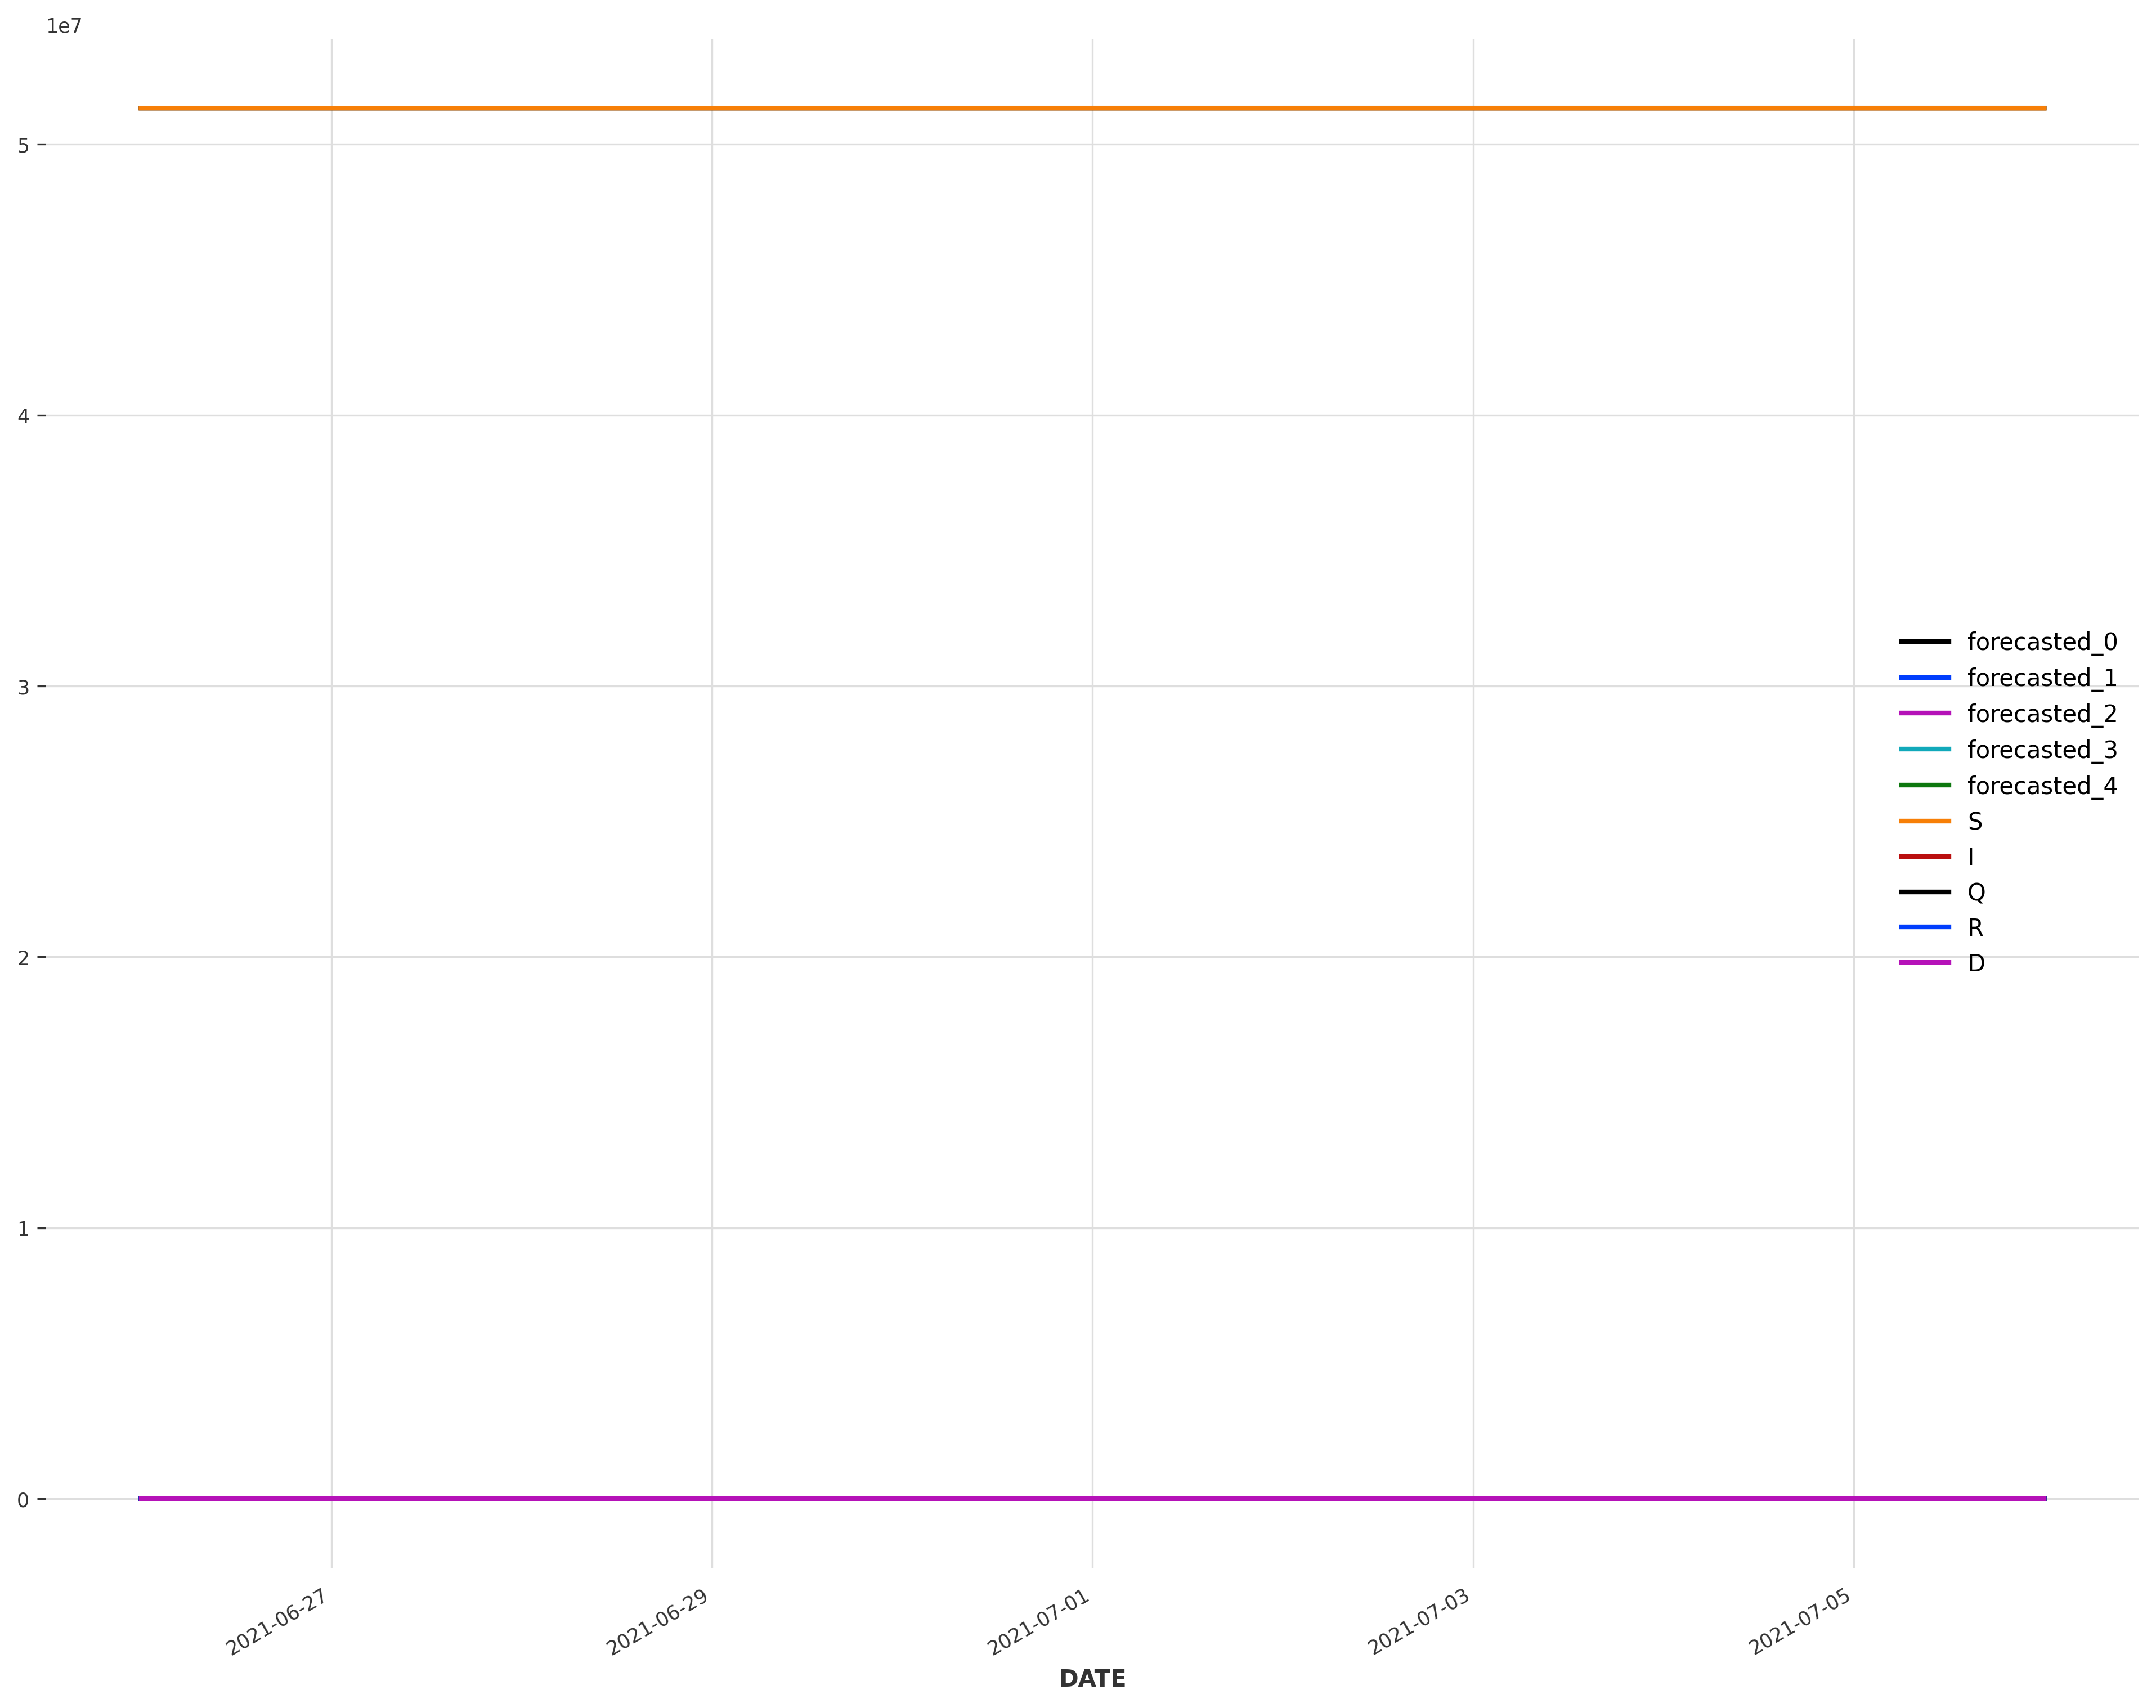

In [66]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

valy=trf.inverse_transform(val_trf)
predy=trf.inverse_transform(pred)

figure(figsize=(16, 12), dpi=300)
# train_trf.plot()
predy.plot(label='forecasted', low_quantile=0.05, high_quantile=0.95)
valy.plot()

plt.legend()

In [67]:
print(mae(valy,predy) )

645.7805405800725


In [68]:
valy.to_csv('TFT_validation_states.csv')
predy.to_csv('TFT_predicted_states.csv')

Transformer

Training: 0it [00:00, ?it/s]

Predicting: 15it [00:00, ?it/s]

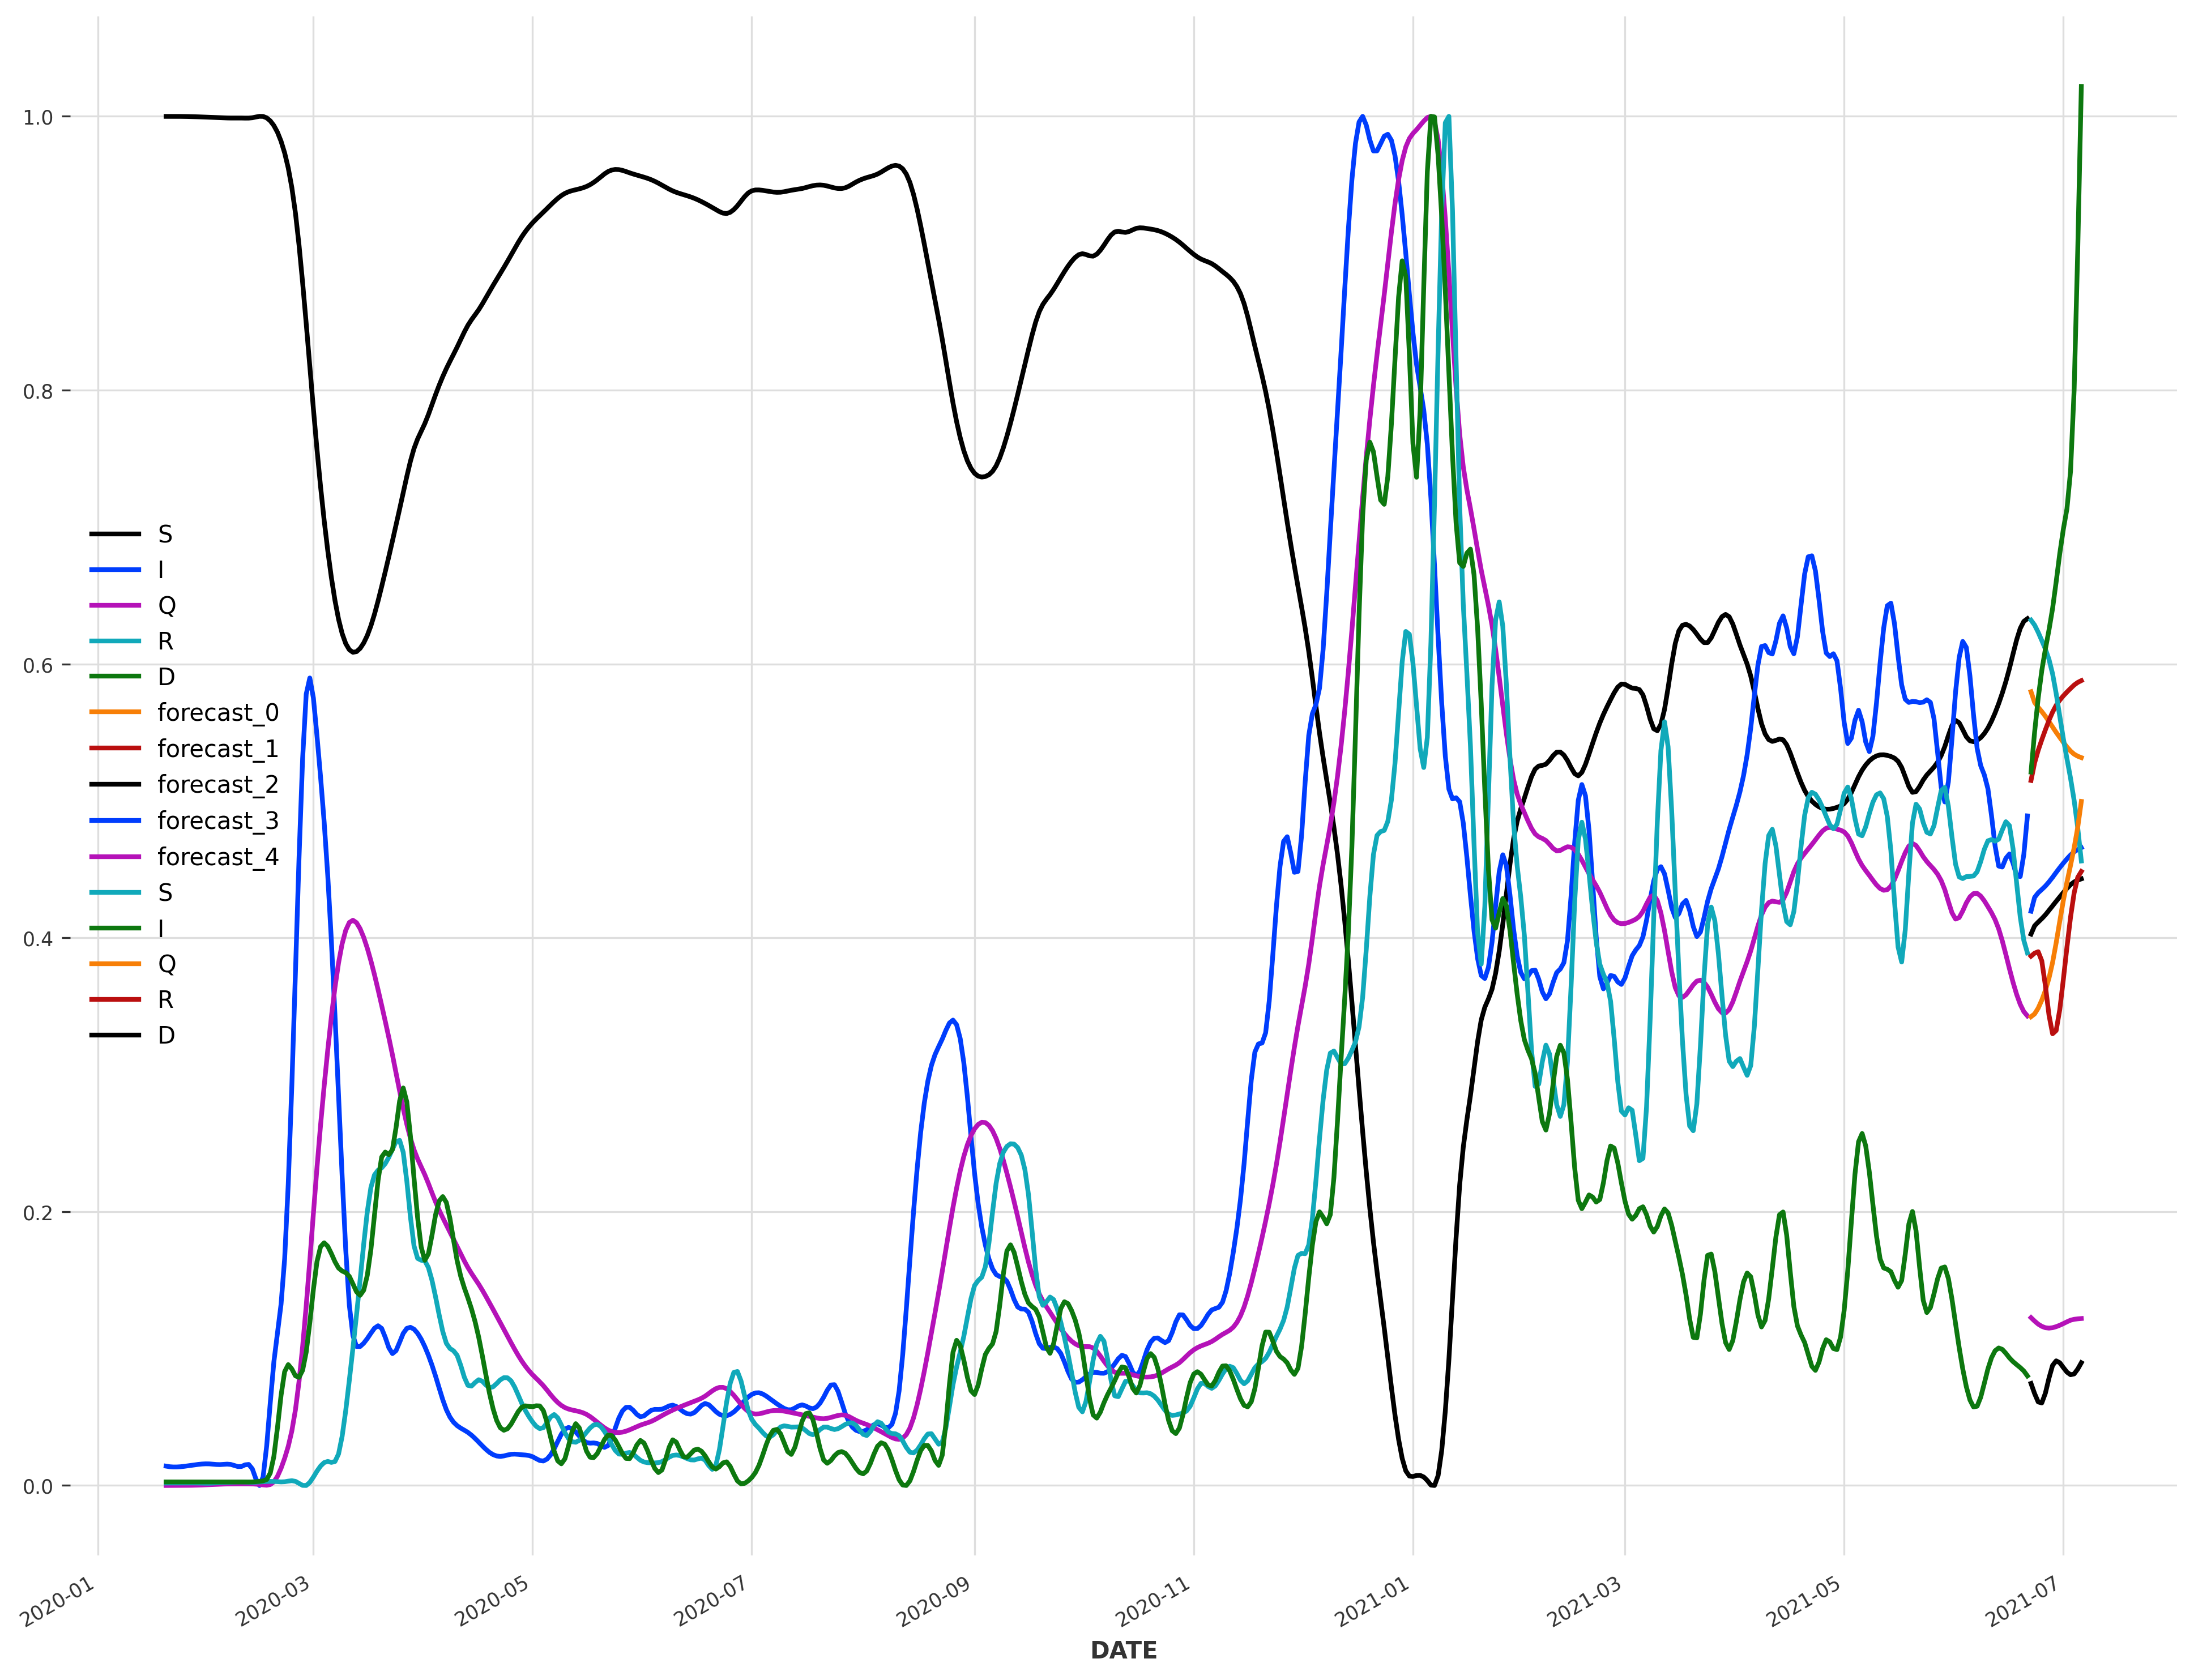

In [69]:
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
# series_scaled = scaler.transform(series)


model=TransformerModel(input_chunk_length=40,
                 output_chunk_length=1,
                 batch_size=32,
                 n_epochs=100,
                 d_model=16,
              nhead=16,
              num_encoder_layers=2,
              num_decoder_layers=2,
              dim_feedforward=128,
              dropout=0.1,
              activation="relu",
              random_state=42,
                # #  batch_size=BATCH,

                #  custom_encoder=None,
                #  custom_decoder=None,
                #  likelihood=None, 
                #  random_state=None,
                   )

model.fit(train_scaled)
prediction = model.predict(len(val_scaled))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=300)

train_scaled.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
val_scaled.plot()
plt.legend()


In [70]:
valy=trf.inverse_transform(val_scaled)
predy=trf.inverse_transform(prediction)
valy.to_csv('Transformer_validation_states.csv')
predy.to_csv('Transformer_predicted_states.csv')
print(mae(valy,predy) )

336.73824874578344


Prophet Model

In [71]:
len(uni_series_S)

534

In [73]:
model = Prophet() 

#----S----------------------------------------------
train, val = uni_series_S[:-15], uni_series_S[-15:]
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
model.fit(train_scaled)
prediction = model.predict(len(val_scaled))
valy=scaler.inverse_transform(val_scaled)
predy=scaler.inverse_transform(prediction)

valy.to_csv('Prophet_validation_S.csv')
predy.to_csv('Prophet_prediction_S.csv')

ma1=mae(valy,predy)

#----I----------------------------------------------
train, val = uni_series_I[:-15], uni_series_I[-15:]
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
model.fit(train_scaled)
prediction = model.predict(len(val_scaled))
valy=scaler.inverse_transform(val_scaled)
predy=scaler.inverse_transform(prediction)
valy.to_csv('Prophet_validation_I.csv')
predy.to_csv('Prophet_prediction_I.csv')
ma2=mae(valy,predy)


#----Q----------------------------------------------
train, val = uni_series_Q[:-15], uni_series_Q[-15:]
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
model.fit(train_scaled)
prediction = model.predict(len(val_scaled))
valy=scaler.inverse_transform(val_scaled)
predy=scaler.inverse_transform(prediction)
valy.to_csv('Prophet_validation_Q.csv')
predy.to_csv('Prophet_prediction_Q.csv')
ma3=mae(valy,predy)


#----R----------------------------------------------
train, val = uni_series_R[:-15], uni_series_R[-15:]
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
model.fit(train_scaled)
prediction = model.predict(len(val_scaled))
valy=scaler.inverse_transform(val_scaled)
predy=scaler.inverse_transform(prediction)
valy.to_csv('Prophet_validation_R.csv')
predy.to_csv('Prophet_prediction_R.csv')
ma4=mae(valy,predy)


#----D----------------------------------------------
train, val = uni_series_D[:-15], uni_series_D[-15:]
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
model.fit(train_scaled)
prediction = model.predict(len(val_scaled))
valy=scaler.inverse_transform(val_scaled)
predy=scaler.inverse_transform(prediction)
valy.to_csv('Prophet_validation_D.csv')
predy.to_csv('Prophet_prediction_D.csv')
ma5=mae(valy,predy)

# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# figure(figsize=(16, 12), dpi=300)


# train_scaled.plot()
# prediction.plot(label='forecasted')
# val_scaled.plot()


print((ma1+ma2+ma3+ma4+ma5)/5)


421.6095259540401
